<a href="https://colab.research.google.com/github/100485446-UC3M/Primera_Practica_Machine_Learning_Grupo16/blob/main/Predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones Práctica 1
## Esteban Gómez Buitrago 100485446
## Nicolás Alejandro Cuesta García 100495966
##Grupo 16

## Análisis Exploratorio de Datos

PAra realizar este projecto utilizamos los set de datos "attrition_availabledata_10.csv" y"attrition_competition_10.csv". Decidimos utilizar estos, después de realizar la suma de los últimos dos digitos del NIA 100485446 (4 + 6 = 10).

Al analizar los datos, la primera conclusión a la que se puede llegar es que este es un problema de clasificación. Se está realizando un estudio en el cual a través de algunas variables se va a definir si la clase (en este caso, el attributo "Attrition") es "Yes" o "No".

Para encontrar ciertos datos importantes para continuar con el análisis, será necesario utilizar ciertas funciones de python. El código y los resultados están descritos a continuación:

In [10]:
import os
print(os.getcwd())

/content


In [11]:
#Las librerías necesarias son importadas
import pandas as pd

In [100]:
#Se lee el fichero de datos
data = pd.read_csv('attrition_availabledata_10.csv')

#Para chequear que sea el set de datos correcto
#print(data.head())

print(f"Número de variables (columnas): {data.shape[1] - 1}")
print(f"Número de instancias (filas): {data.shape[0]}")
valoresvacios = data.isnull().sum()
print("Valores vacíos por columna:\n", valoresvacios.to_dict())
print(f"Número total de valores vacíos: {data.isnull().sum().sum()}")

#Las columnas de tipo object son las categóricas
categorical_cols = data.select_dtypes(include=['object'])
unique_counts = categorical_cols.nunique()
print("\nNúmero de categorías por variable categórica:\n", unique_counts.to_dict())
constant_columns = data.columns[data.nunique() == 1].tolist()
print("\nColumnas constantes:\n", constant_columns)
id_cols = data.columns[data.nunique() == data.shape[0]]
print("Columnas de ID:\n", id_cols)

num_yes = data["Attrition"].eq("Yes").sum()
num_no = data["Attrition"].eq("No").sum()
Total_attrition = num_no + num_yes
if Total_attrition == data.shape[0]:
  print(f"\nNúmero de empleados que dejaron la empresa (Attrition = Yes): {num_yes}")
  print(f"Número de empleados que no dejaron la empresa (Attrition = No): {num_no}")
else:
  print("Error en el número de instancias, hay valores no reconocidos")


Número de variables (columnas): 30
Número de instancias (filas): 2940
Valores vacíos por columna:
 {'hrs': 0, 'absences': 0, 'JobInvolvement': 0, 'PerformanceRating': 0, 'EnvironmentSatisfaction': 15, 'JobSatisfaction': 12, 'WorkLifeBalance': 29, 'Age': 0, 'BusinessTravel': 0, 'Department': 0, 'DistanceFromHome': 0, 'Education': 0, 'EducationField': 0, 'EmployeeCount': 0, 'EmployeeID': 0, 'Gender': 0, 'JobLevel': 0, 'JobRole': 0, 'MaritalStatus': 0, 'MonthlyIncome': 0, 'NumCompaniesWorked': 17, 'Over18': 0, 'PercentSalaryHike': 0, 'StandardHours': 0, 'StockOptionLevel': 0, 'TotalWorkingYears': 5, 'TrainingTimesLastYear': 0, 'YearsAtCompany': 0, 'YearsSinceLastPromotion': 0, 'YearsWithCurrManager': 0, 'Attrition': 0}
Número total de valores vacíos: 78

Número de categorías por variable categórica:
 {'BusinessTravel': 3, 'Department': 3, 'EducationField': 6, 'Gender': 2, 'JobRole': 9, 'MaritalStatus': 3, 'Over18': 1, 'Attrition': 2}

Columnas constantes:
 ['EmployeeCount', 'Over18', 'Sta

El estudio será realizado con 30 variables y 2940 instancias distintas. Es importante resaltar que al número de variables se le resto la variable "Attrition" ya que esta es nuestra variable de calisifcación (objetivo). Después de analizar las variable individualmente encontramos que tenemos variables catégoricas, ordinales y númericas.

Las variabes **catégoricas** son (7):   

*   BusinessTravel
*   Department
*   EducationField
*   Gender
*   JobRole
*   MaritalStatus
*   Over18

Las **númericas** incluyen (15):  

*   hrs
*   absences
*   Age
*   DistanceFromHome
*   MonthlyIncome
*   PercentSalaryHike
*   TotalWorkingYears
*   TrainingTimesLastYear
*   NumCompaniesWorked
*   EmployeeCount
*   EmployeeID
*   StandardHours
*   YearsAtCompany
*   YearsSinceLastPromotion
*   YearsWithCurrManager

Finalmente, entre las **ordinales** están (8):

*   JobInvolvement
*   JobLevel
*   Education
*   PerformanceRating
*   EnvironmentalSatisfaction
*   JobSatisfaction
*   WorkLifeBalance
*   StockOptionLevel

Para definir si una variable es de **alta cardinalidad** o no vamos a tomar el límite de **5 categorías**. Tomando este límite podemos ver que **existen 2 variables que tendrían alta cardinalidad**: EducationField (6) y JobRole (9). El resto de variables categóricas tienen 3 o menos categorías cada una, por lo que no tienen una cardinalidad alta.

Asimismo, es pertinente analizar si tenemos variables que tengan el mismo valor en todas las instancia (**columnas constantes**).  Como se puede evidenciar en el código anterior, exite una variable "Over18", que siempre tiene el mismo valor ("Y"). De esta forma se puede concluir que **'Over18', 'EmployeeCount' y 'StandardHours' son una columnas constantes** y no le va a proporciona información útil al modelo, se deberá tratar con ella en el preproceso.

Hay que buscar **columnas de ID** que son columnas que tienen un valor diferente para cada instancia, y pueden servir como identificadores. Con el código encontramos que tenemos una columna que cumple con esta descripción. La variable **"EmployeeID" es una columna de ID**.

Entre todas estas instancias tenemos **78 valores vacíos** dividos en 5 variables: WorkLifeBalance (29),  NumCompaniesWorked: (17), EnvironmentSatisfaction (15), Job Satisfaction (12), y TotalWorkingYears (5). Esto es un factor a tener en cuenta a la hora de realizar el preproceso.

Cómo ya se describió antes, este es un problema de **clasificación**, para  finalizar, es pertinente analizar si está balanceado. La variable "*Attrition*" es nuestro clasificador, esta puede tener el valor de "Yes" o  "No". Para saber si está balanceado se debe ver cuantas intancias existen con cada valor. Como se puede ver en el código expuesto previamente, en este caso exiten 474 instancias que tienen en esta variable el valor de  "Yes" y 2466 que tienen "No". Con esto se puede concluir que el problema **NO está balanceado**, y se tendrá que utilizar una técnica de balanceo durante el preproceso.


## Preprocesado

Durante esta fase se llevarán a cabo 5 tares principales. La primera tarea es remover las columnas constantes o/y ID ya que estas no van a proveer de información útil al modelo. Posteriormente se tratarán los valores vacíos del set de datos. Como ya vimos en la fase de EDA, no existe ninguna variable en la que 80% de los datos esten vaciós, por lo que no removeremos ninguna. Ahora, revisamos si hay alguna fila en la que la mayoría de las variables sean nulos (si lo hay, se eliminará). Si decidieramos elimanr todas las filas que tienen al menos un valor NA perderíamos muchos datos, por lo que se va a utilizar una técnica para darle valor a estos campos. En este caso vamos a emplear imputación multivariable para tratar con los valores NA de las filas que restantes. Se tomó la decisión de usar esta técnica ya que las variables que tienen valores nulos no están relacionadas con solo una variable (que nos permitiría hacer imputación univariable), por el contrario, parecen ser afectadas por todas las variables en conjunto.


In [105]:
import numpy as np
import sklearn as sk
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


#Se crea una semilla para poder replicar los resultado y se leen los datos
np.random.seed(100495966)

In [106]:
#Primero removemos las columnas constantes y de ID.
x = data.drop(columns=["Over18", "EmployeeID", "EmployeeCount", "StandardHours", "Attrition"])

#Ahora vamos a tratar con los elementos vacíos
threshold = 0.3 * data.shape[1]
filas_con_muchos_na = data[data.isna().sum(axis=1) > threshold]
print(f"Filas con más de 30% de sus columnas vacías: {filas_con_muchos_na.shape[0]}")
#Creamos un imputer multivariable
imputer= IterativeImputer(max_iter= 10, random_state=100495966)
#Aunque en este caso todas son númericas, esto debe especificarse, con el motivo de evitar errores
num_cols = x.select_dtypes(include=[np.number]).columns
x[num_cols] = imputer.fit_transform(x[num_cols])

#Chequeamos si aún existen valores vacíos.
print(f"Valores nulos restantes después de imputación: {x.isna().sum().sum()}")


Filas con más de 30% de sus columnas vacías: 0
Valores nulos restantes después de imputación: 0


Ahora vamos a cdificar las Variables Categóricas, para esto utilizaremos el método de One-Hot-Encoding.

In [107]:
onehot_columns = ['BusinessTravel', 'Gender','Department', 'EducationField', 'JobRole', 'MaritalStatus']

x = pd.get_dummies(x, columns=onehot_columns, drop_first=True)
x = x.astype(int)

print(x.head())



   hrs  absences  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0    7        13               3                  3                        3   
1    7         6               1                  3                        3   
2    7        16               2                  4                        1   
3    9         6               3                  4                        3   
4    6         6               4                  3                        3   

   JobSatisfaction  WorkLifeBalance  Age  DistanceFromHome  Education  ...  \
0                3                3   48                12          4  ...   
1                4                4   31                 2          2  ...   
2                1                3   36                14          3  ...   
3                3                3   49                 1          3  ...   
4                2                3   40                10          4  ...   

   JobRole_Human Resources  JobRole_Laboratory Tec

El siguiente paso es normalizar los valores, esto debido a que poseemos diferentes magnitudes entre las variables. Por ejemplo, la columna "Monthly Income" maneja valores de 6 o 7 digitos; mientras que "Education" tiene valores del 1 al 5. Para decidir qué método de normalización utilizar se debe analizar las variables. Para esto tomamos un grupo de variables aleatoriamente y las graficamos para ver su tendencia.

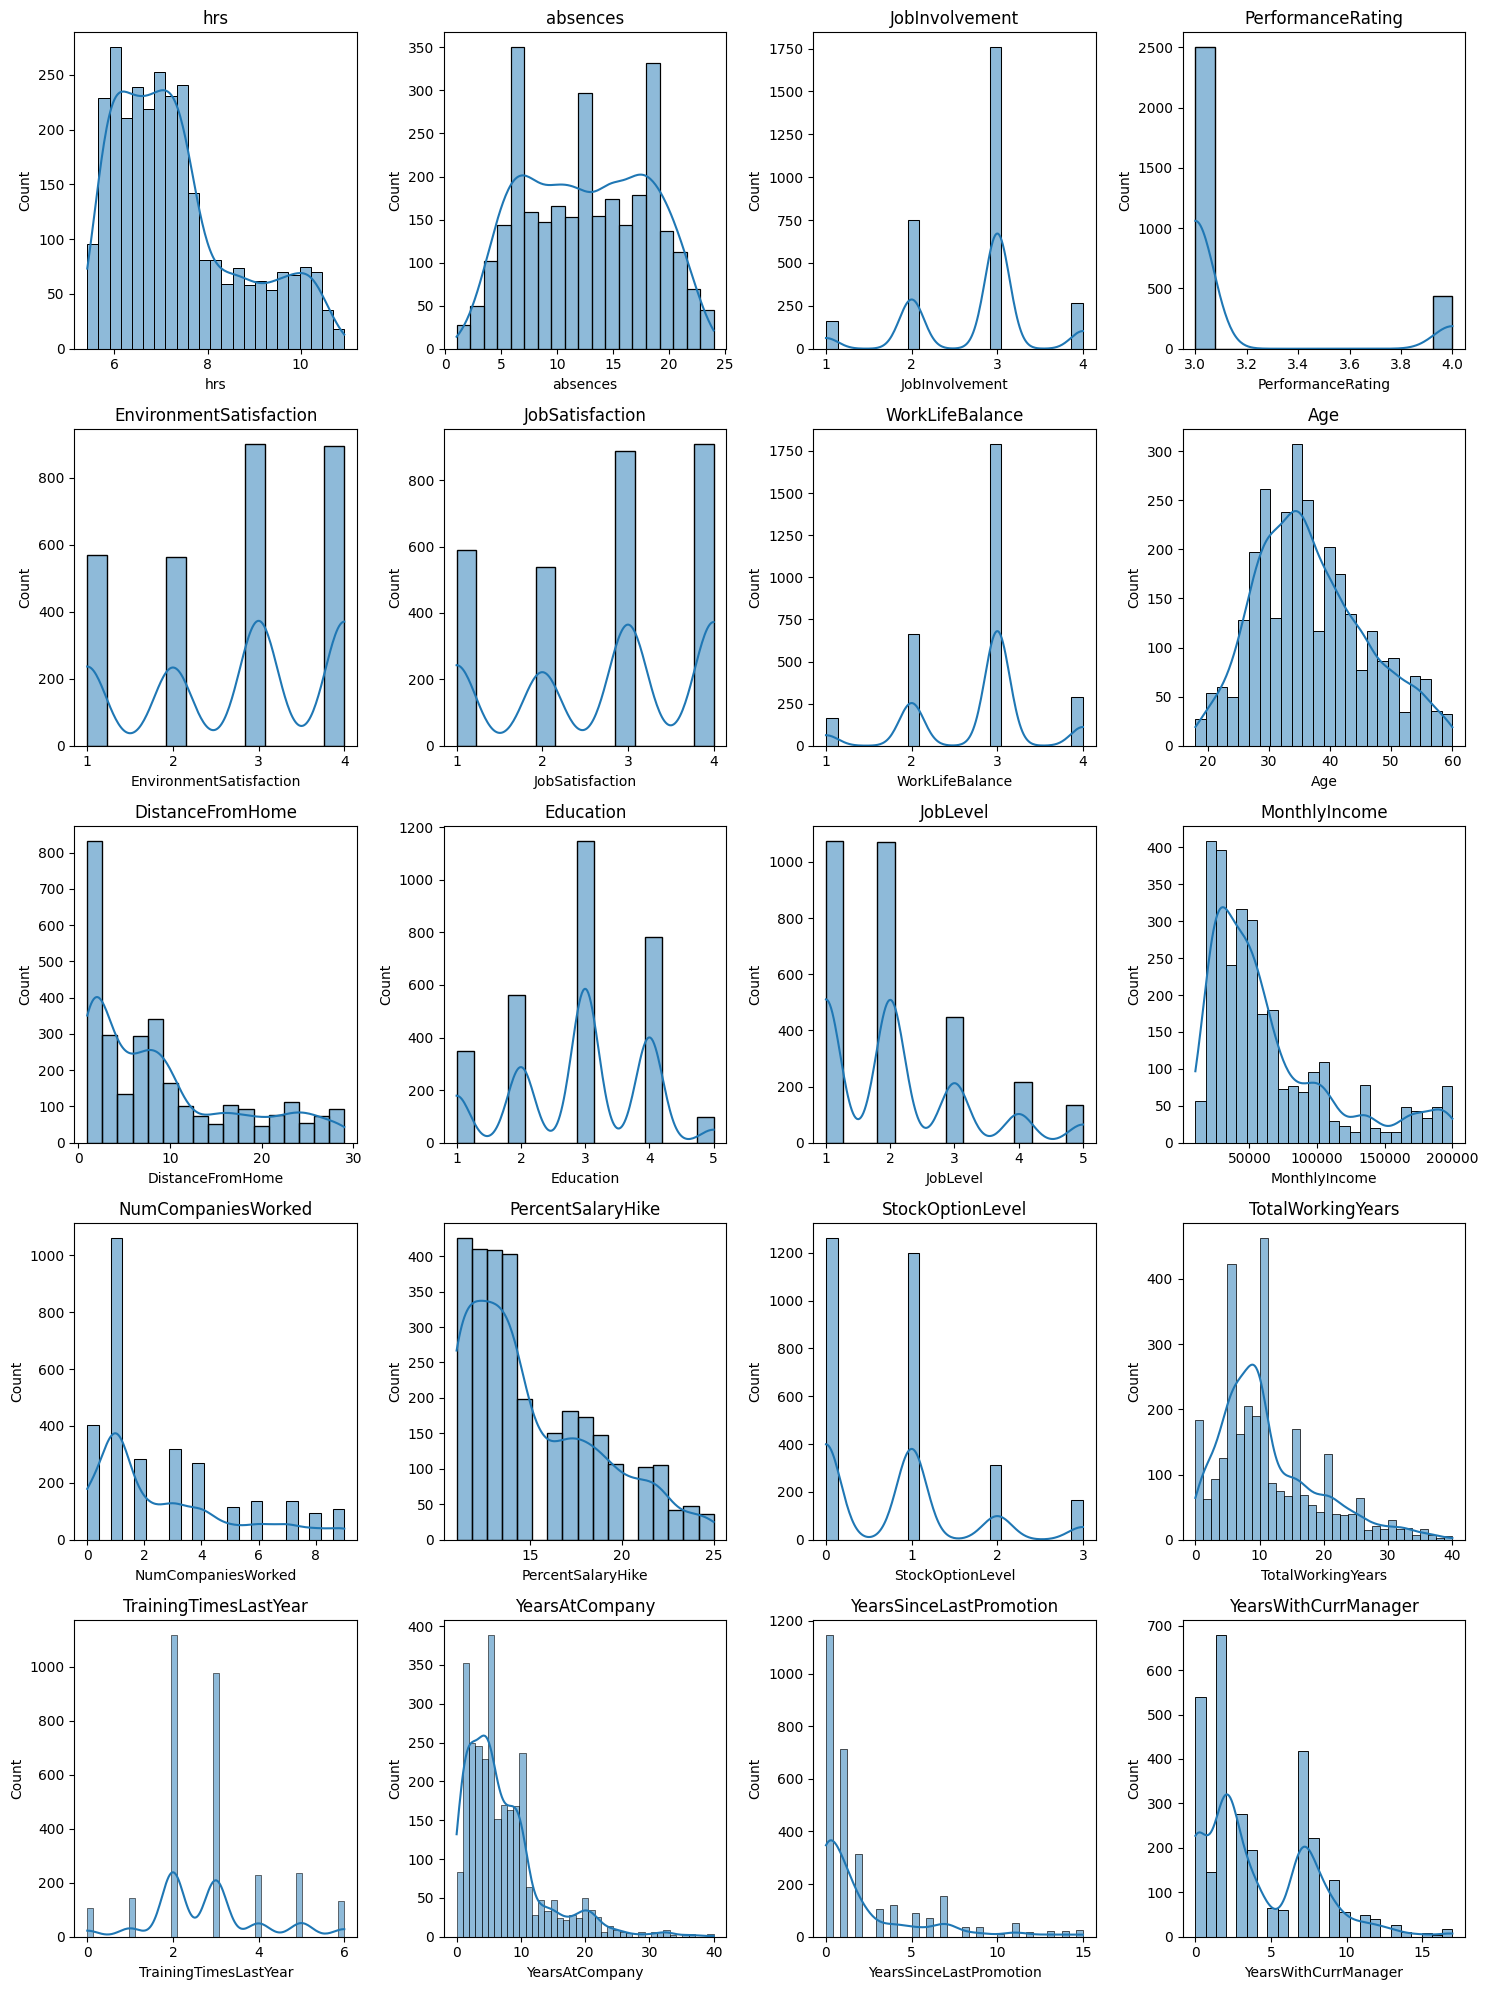

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = [
    "hrs", "absences", "JobInvolvement", "PerformanceRating", "EnvironmentSatisfaction",
    "JobSatisfaction", "WorkLifeBalance", "Age", "DistanceFromHome", "Education",
    "JobLevel", "MonthlyIncome", "NumCompaniesWorked","PercentSalaryHike",
    "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

# Número de gráficos por linea
img_cols = 4
num_rows = (len(numeric_columns) + img_cols - 1) // img_cols  # calcular número de líneas

fig, axes = plt.subplots(num_rows, img_cols, figsize=(15, 4 * num_rows))

axes = axes.flatten()

# Graficar las variables
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])  # KDE helps visualize density
    axes[i].set_title(col)

# Si hay gráficos vacíos, se remueven
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


En este caso tenemos variables que tienen una distrbución normal y otras con distribución sesgada. Utilizaremos el método de estandarización en las que tengan una distribución aproximada a una campana de Gauss, y no haya presencia de una gran cantidad de outliers. Por el otro lado, utilizaremos MinMax cuando exista una distribución claramente sesgada. Las variables que fueron creadas a partir de las variables categóricas no van a ser normalizadas ya que son valores entre 0 y 1 (no están escalados). Es importante resaltar que el objetivo final es que las variables tengan el mismo peso, tienendo en cuenta que ahora los datos tienen escalas muy diferentes.

In [108]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Normalizamos los datos mediante Estandarización y MinMax
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

standard_columns = ['absences','JobInvolvement','WorkLifeBalance', 'Age', 'PerformanceRating',
                    'EnvironmentSatisfaction', 'JobSatisfaction', 'Education','TrainingTimesLastYear']
minmax_columns = ['hrs', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']

 # Normaliza las variables de acuerdo a su técnica
x[standard_columns] = standard_scaler.fit_transform(x[standard_columns])
x[minmax_columns] = min_max_scaler.fit_transform(x[minmax_columns])

print(x.head())  # Ver datos normalizados


   hrs  absences  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0  0.4  0.068187        0.391348          -0.420084                 0.256472   
1  0.4 -1.211024       -2.456580          -0.420084                 0.256472   
2  0.4  0.616421       -1.032616           2.380476                -1.571474   
3  0.8 -1.211024        0.391348           2.380476                 0.256472   
4  0.2 -1.211024        1.815312          -0.420084                 0.256472   

   JobSatisfaction  WorkLifeBalance       Age  DistanceFromHome  Education  \
0         0.254181         0.352681  1.229661          0.392857   1.066988   
1         1.158891         1.771125 -0.648309          0.035714  -0.878404   
2        -1.555240         0.352681 -0.095965          0.464286   0.094292   
3         0.254181         0.352681  1.340129          0.000000   0.094292   
4        -0.650530         0.352681  0.345910          0.321429   1.066988   

   ...  JobRole_Human Resources  JobRole_Laborator

Ahora continuamos con la elección de las variables que utilizaremos.

In [ ]:
# Determinamos cuál de la variables es nuestro objetivo
y = data["Attrition"]